In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os,time
import numpy as np
import matplotlib.pyplot as plt 
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

## Generate neutrinos fluxes

In [3]:
#info of DM : PeV = 10e15 eV
mass1 = 1e3 #(1 TeV)
mass2 = 1e6 #(1 PeV)
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin         = 10
Emax1        = mass1
Emax2        = mass2

nodes        = 100
bins         = 300

#info of oscillation parameters
theta_12=33.82
theta_13=8.6
theta_23=48.6
delta_m_12=7.39e-5
delta_m_13=2.528e-3
delta = 221.


#linear space of outcoming energies 
logscale = True #default
#include interactions
interactions = True #default

### Channel $\nu_{\mu}\nu_{\mu}$

In [4]:
#construct the flux object.
Flux_mu1 = propa.NuFlux('numunumu',mass1,nodes,Emin=Emin,Emax=Emax1,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

Flux_mu2 = propa.NuFlux('ee',mass2,nodes,Emin=Emin,Emax=Emax2,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

flux_ini_Halo_mu1 = Flux_mu1.iniFlux('Halo')
flux_ini_Halo_mu2 = Flux_mu2.iniFlux('Halo')

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


### Channel $\nu_{\tau}\nu_{\tau}$

In [5]:
Flux_tau1 = propa.NuFlux('nutaunutau',mass1,nodes,Emin=Emin,Emax=Emax1,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

Flux_tau2 = propa.NuFlux('ee',mass2,nodes,Emin=Emin,Emax=Emax2,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

flux_ini_Halo_tau1 = Flux_tau1.iniFlux('Halo')
flux_ini_Halo_tau2 = Flux_tau2.iniFlux('Halo')

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


### Channel $\nu_{e}\nu_{e}$

In [6]:
Flux_e1 = propa.NuFlux('nuenue',mass1,nodes,Emin=Emin,Emax=Emax1,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

Flux_e2 = propa.NuFlux('ee',mass2,nodes,Emin=Emin,Emax=Emax2,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

flux_ini_Halo_e1 = Flux_e1.iniFlux('Halo')
flux_ini_Halo_e2 = Flux_e2.iniFlux('Halo')

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


In [7]:
xe1 = Flux_e1.iniE()#/mass1
xe2 = Flux_e2.iniE()#/mass2

xtau1 = Flux_tau1.iniE()#/mass1
xtau2 = Flux_tau2.iniE()#/mass2

xmu1 = Flux_mu1.iniE()#/mass1
xmu2 = Flux_mu2.iniE()#/mass2

### Icecube energy range : 10 GeV to PeV

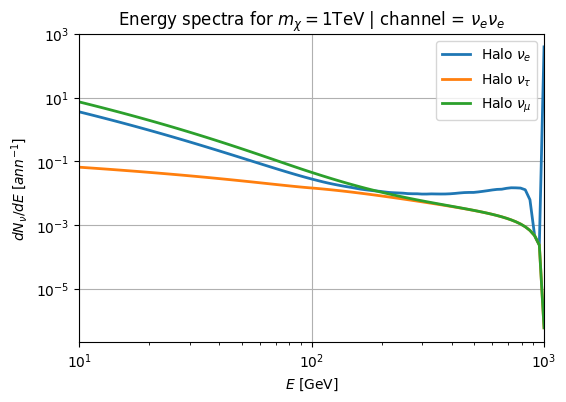

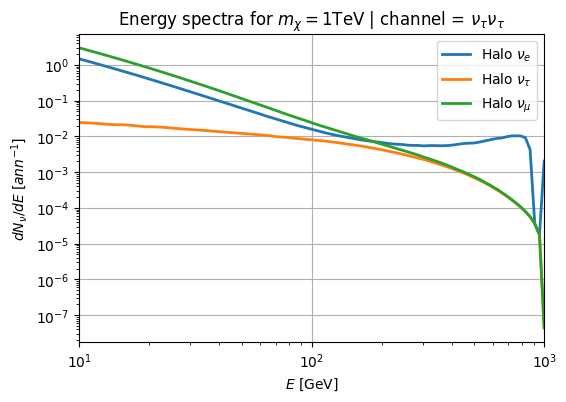

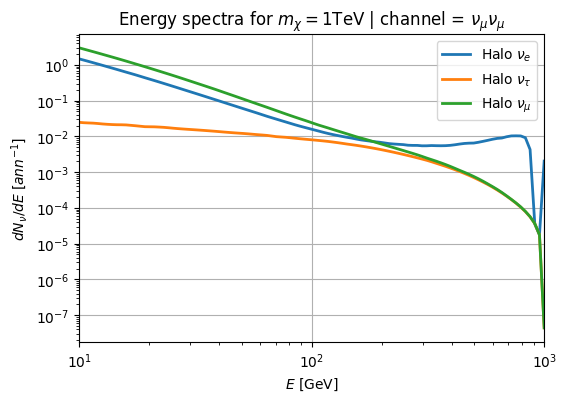

In [14]:
plt.figure(figsize = (6,4))
plt.title(r'Energy spectra for $m_{\chi} = 1$TeV | channel = $\nu_{e}\nu_{e}$')
plt.plot(xe1,flux_ini_Halo_e1['nu_e'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(xtau1,flux_ini_Halo_e1['nu_tau'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\tau$')
plt.plot(xmu1,flux_ini_Halo_e1['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')
plt.yscale('log')
plt.semilogx()
plt.ylim(top = 10**3)
plt.xlim(10, Emax1)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE\;[ann^{-1}]$")
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Energy spectra for $m_{\chi} = 1$TeV | channel = $\nu_{\tau}\nu_{\tau}$')
plt.plot(xe1,flux_ini_Halo_tau1['nu_e'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(xtau1,flux_ini_Halo_tau1['nu_tau'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\tau$')
plt.plot(xmu1,flux_ini_Halo_tau1['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')
plt.yscale('log')
plt.semilogx()
plt.xlim(10, Emax1)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE\;[ann^{-1}]$")
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Energy spectra for $m_{\chi} = 1$TeV | channel = $\nu_{\mu}\nu_{\mu}$')
plt.plot(xe1,flux_ini_Halo_mu1['nu_e'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(xtau1,flux_ini_Halo_mu1['nu_tau'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\tau$')
plt.plot(xmu1,flux_ini_Halo_mu1['nu_mu'],linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')
plt.yscale('log')
plt.semilogx()
plt.xlim(10, Emax1)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE\;[ann^{-1}]$")
plt.legend()

## Computing J-factor

In [10]:
from charon import profile 

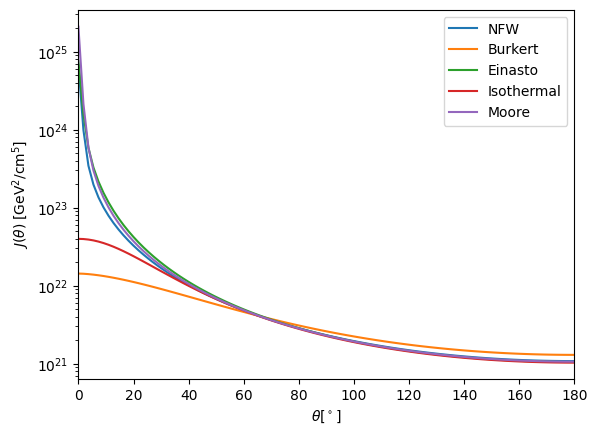

In [11]:
R       = 100.  #maximum of the line of sight in kpc 
d       = 8     #distance from Earth to the Galactic center in kpc
process = 'ann' #decay or ann
theta   = 0.    #angle between the line connecting the Earth and the Galactic Center and the line of sight in radian.
r = np.logspace(-4,2,100)
theta = np.linspace(0.,np.pi,100)
pros   = [profile.NFW,profile.Burkert,profile.Einasto,profile.Isothermal,profile.Zhao] 
labels = ['NFW','Burkert','Einasto','Isothermal','Moore']
for i in range(5):
    J         = profile.J(pros[i],R,d,process)
    Jtheta = [J.Jtheta(j) for j in theta]
    plt.plot(np.rad2deg(theta),Jtheta,label=labels[i])
plt.xlim(0.,180) 
plt.yscale('log') 
plt.xlabel(r'$\theta [^\circ]$')
plt.ylabel(r'$J(\theta)\;[\mathrm{GeV^2/cm^5}]$')
plt.legend()

In [12]:
R       = 100.  #maximum of the line of sight in kpc 
d       = 8     #distance from Earth to the Galactic center in kpc
process = 'ann' #decay or ann
theta   = 0.    #angle between the line connecting the Earth and the Galactic Center and the line of sight in radian.
r = np.logspace(-4,2,100)
theta = np.linspace(0.,np.pi,100)
pros   = [profile.NFW,profile.Burkert,profile.Einasto,profile.Isothermal,profile.Zhao] 
labels = ['NFW','Burkert','Einasto','Isothermal','Moore']
J      = profile.J(pros[1],R,d,process)
Jtheta_NFW = [J.Jtheta(j) for j in theta]

## Multiplying J-factor & flux

J-factor = array with 1000 values in it
<br>
Flux = array where each element is a list (1000 elements)
- Multiplying each list of the flux with the correspond J-factor element 

In [13]:
Transpose_flux = flux_ini_Halo_e2['nu_e'][:,None] #c = b[:,None]
Flux_times_J = Transpose_flux*Jtheta_NFW
print(Flux_times_J.shape)

(100, 100)


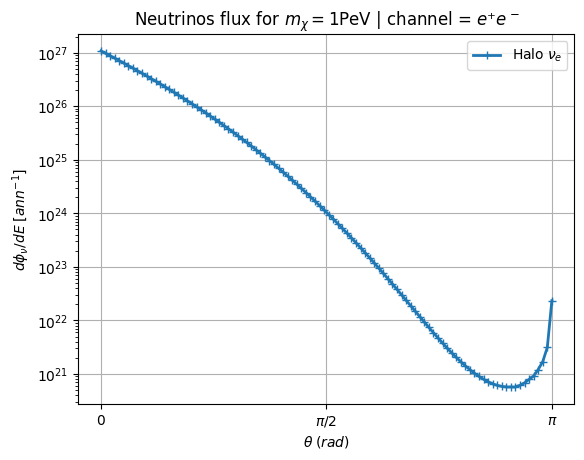

In [14]:
plt.title('Neutrinos flux for $m_{\chi} = 1$PeV | channel = $e⁺e^-$')
plt.plot(theta,Flux_times_J[:,1],'-+',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.yscale('log')
plt.grid()
plt.xlabel(r"$\theta \; (rad)$")
plt.xticks(ticks=[0,np.pi/2,np.pi],labels=['$0$','$\pi/2$','$\pi$'])
plt.ylabel(r"$d\phi_\nu/dE\;[ann^{-1}]$")
plt.legend()

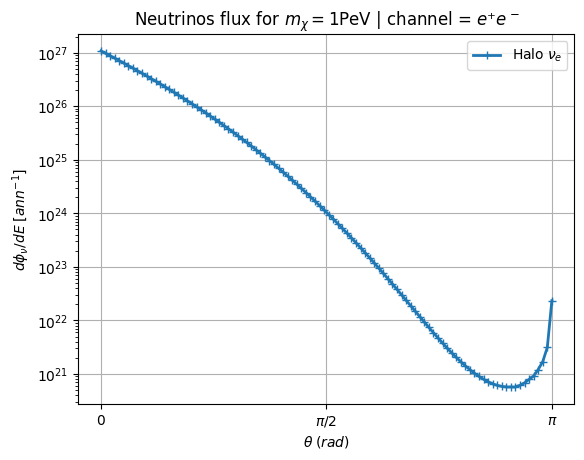

In [15]:
plt.title('Neutrinos flux for $m_{\chi} = 1$PeV | channel = $e⁺e^-$')
plt.plot(theta,Flux_times_J[:,1],'-+',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.yscale('log')
#plt.semilogx()
plt.grid()
plt.xlabel(r"$\theta \; (rad)$")
plt.xticks(ticks=[0,np.pi/2,np.pi],labels=['$0$','$\pi/2$','$\pi$'])
plt.ylabel(r"$d\phi_\nu/dE\;[ann^{-1}]$")
plt.legend()